# Factors which affect Bike Rent Count and Duration.

## Investigation Overview

**In this investigation, I wanted look at what affects Bikeshare usage and Rent duration in a citywide bike share service. Bikeshare usage and Rent duration are important for a successful citywide bikeshare service. The main focus was on the age, gender, and user type of people who used the bike share service.**

## Dataset Overview

**This dataset consisted of 183412 bike rentals from the Ford GoBike bikeshare service in the San Francisco Bay area. The dataset contained 183412 entries and the data was collected from 02/01/2019 to 03/01/2019. 8460 entries out of 183412 entries were dropped due inconsistencies in the data. 700 entries were dropped while observing duration data as the those entries were extreme outliers.**

## Preliminary Wrangling

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#load the dataset into a pandas dataframe

bikeshare = pd.read_csv('201902-fordgobike-tripdata.csv')

## Data Wrangling

In [3]:
#make copy of bikeshare dataset
bikeshare_c = bikeshare.copy()

In [4]:
#drop rows with null values of copied bikeshare dataset
bikeshare_c = bikeshare_c.dropna()

In [5]:
#change start_time column and end_time column to datetime format
bikeshare_c['start_time'] = pd.to_datetime(bikeshare_c['start_time'])
bikeshare_c['end_time'] = pd.to_datetime(bikeshare_c['end_time'])

In [6]:
#make start_time_date, end_time_date column with dt.date 
bikeshare_c['start_time_date'] = bikeshare_c['start_time'].dt.date
bikeshare_c['end_time_date'] = bikeshare_c['end_time'].dt.date

In [7]:
#make start_hour, end_hour column with dt.date 
bikeshare_c['start_hour'] = bikeshare_c['start_time'].apply(lambda x:x.hour)
bikeshare_c['end_hour'] = bikeshare_c['end_time'].apply(lambda x:x.hour)
#make start_time_dow with .dayofweek
bikeshare_c['start_time_dow'] = bikeshare_c['start_time'].apply(lambda x:x.dayofweek)

In [8]:
#make duration_min column 
bikeshare_c['duration_min'] = round(bikeshare_c['duration_sec']/60).astype(int)

In [9]:
#make dictionary for numbers representing day of week. Apply it in the 'start_time_dow' column.
dow_dict = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bikeshare_c['start_time_dow'] = bikeshare_c['start_time_dow'].map(dow_dict)

Below, make for loop to remove the information inside parenthesis of start_station_name and end_station_name.

In [10]:
#columns which where we need to remove parenthesis information
n_columns = ['start_station_name','end_station_name']
#for loop to remove parenthesis
for x in n_columns:
    bikeshare_c[x]=bikeshare_c[x].apply(lambda x:x.split("(")[0])

Below, make for loop to change floats into integers.

In [11]:
#columns to change into integers
f_columns = ['member_birth_year','start_station_id','end_station_id']
#for loop to change floats into integers
for x in f_columns:
    bikeshare_c[x]=bikeshare_c[x].astype(int)
#columns to change into objects
i_columns = ['start_station_id','end_station_id']
#for loop to change integers into objects
for x in i_columns:
    bikeshare_c[x]=bikeshare_c[x].astype(object)

In [12]:
#make age column by subtracting member_birth_year column from 2019
bikeshare_c['age'] = 2019 - bikeshare_c['member_birth_year']
#make age column from float into int
bikeshare_c['age'] = bikeshare_c['age'].astype(int)

In [13]:
#filter out rows where member_birth_year is before 1907
bikeshare_c = bikeshare_c[bikeshare_c['member_birth_year']>1907]

### Ratio of Subscribers vs Customers for Bike Share Service.

Most users of the bike share program were subscribers. A little over 90 percent of the users were subscribers while only 9.5 percent of the users were customers.

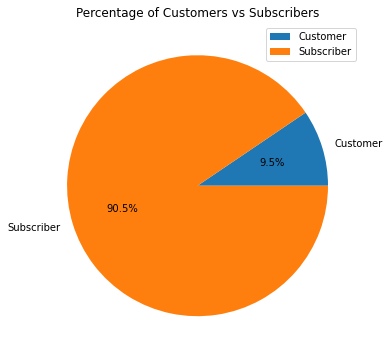

In [14]:
#Make pie chart comparing the percentages of Customers and Subscribers
plt.figure(figsize=(6,6))
pie_chart_data = bikeshare_c.groupby("user_type").count()
my_labels = 'Customer','Subscriber'
ax_01_01 = plt.pie(data=pie_chart_data,x="bike_id",labels=my_labels,autopct='%1.1f%%')
plt.legend(loc='upper right')
plt.title('Percentage of Customers vs Subscribers')
plt.show()

### How Gender affects Bikeshare usage.
Users of the bikeshare are overwhelmingly male. There are three times more Males than Females and Other combined.

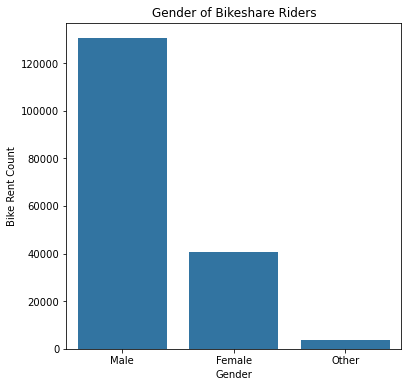

In [15]:
#Use countplot function to compare bike rent count between male,female, and other
plt.figure(figsize = (6,6))
base_color = sns.color_palette()[0]
#order for gender variable
order_1 = ['Male','Female','Other']
sns.countplot(data = bikeshare_c, x = 'member_gender', order = order_1, color = base_color)
plt.title('Gender of Bikeshare Riders')
plt.ylabel('Bike Rent Count')
plt.xlabel('Gender')
plt.show()

### How Age affects Bikeshare usage.
The distribution of Age vs Bike rent count is a right skewed graph. Most bikeshare users are between 20 - 40 years of age.

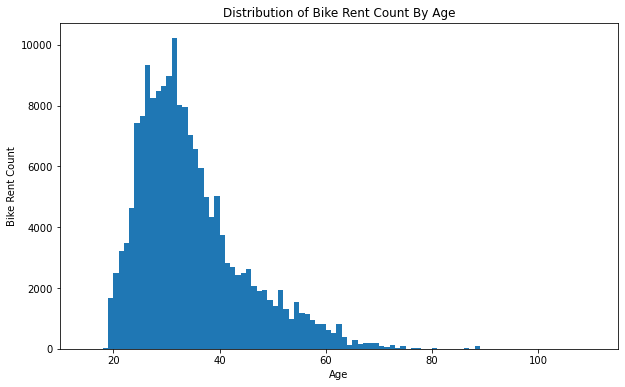

In [16]:
#Use plt.hist to see the distribution of bike rent count by age.
plt.figure(figsize = (10,6))
#Set bin size for histogram
bins_1 = np.arange(10,120,1)
#Set limits for x (Age)
plt.xlim([10,115])
plt.hist(data = bikeshare_c, x = 'age',bins = bins_1 )
plt.title('Distribution of Bike Rent Count By Age')
plt.ylabel('Bike Rent Count')
plt.xlabel('Age')
plt.show()

### Days of the week when most bikes were rented.
Bikes were least rented on Saturday and Sunday. Bikes were most rented on Thursday. Bikes are rented more on weekdays than weekends.

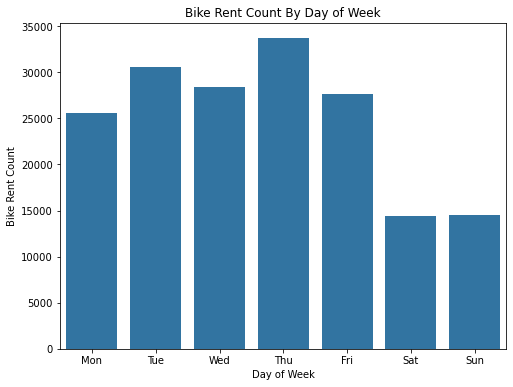

In [17]:
#Make countplot of bike rent count by day of week
plt.figure(figsize=(8,6))
base_color = sns.color_palette()[0]
#Day of week order
dow_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
#use original bikeshare_c dataframe, use start_time_dow as bike rental day of week
sns.countplot(data = bikeshare_c, x='start_time_dow',order = dow_order,color=base_color)
plt.xlabel('Day of Week')
plt.ylabel('Bike Rent Count')
plt.title('Bike Rent Count By Day of Week')
plt.show()

### Hours of the Day when most bikes were rented.

8:00 and 17:00 (military time) were the most popular times to rent bikes. This is probably because 8:00 was the time when people went to work, and 17:00 was when people went home. It seems that the bikes were used for commuting.

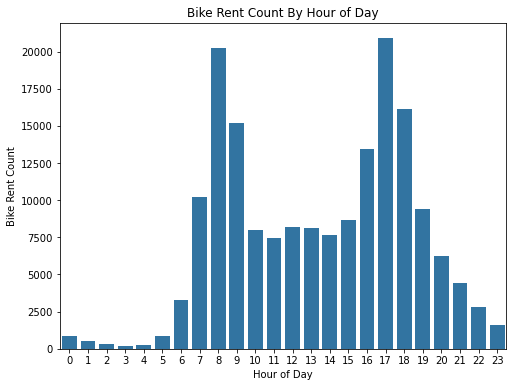

In [20]:
#Use countplot to explore bike rent count by start hour
plt.figure(figsize = (8,6))
base_color = sns.color_palette()[0]
#Use original bikeshare_c dataframe and start_hour column as hour of day
sns.countplot(data = bikeshare_c, x='start_hour',color=base_color)
plt.xlabel('Hour of Day')
plt.ylabel('Bike Rent Count')
plt.title('Bike Rent Count By Hour of Day')
plt.show()

### Correlation of Age and Bikeshare Rental Duration
The pearson r value of Age and Duration is 0.01. There is no correlation between Age and bike rental duration. Also, there were extreme outliers in the dataset in terms of duration.

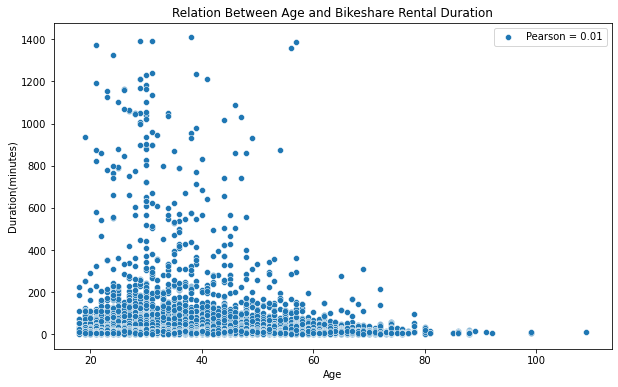

In [21]:
#import pearsonr from scipy.stats
from scipy.stats import pearsonr
#get pearson r value with pearsonr function
r, pvalue = pearsonr(bikeshare_c['age'], bikeshare_c['duration_min'])
plt.figure(figsize = (10,6))
#make scatterplot with pearsonr label
sns.scatterplot(data = bikeshare_c, x = 'age', y = 'duration_min',label=f'Pearson = {r:.2f}')
plt.xlabel('Age')
plt.ylabel('Duration(minutes)')
plt.title('Relation Between Age and Bikeshare Rental Duration')
plt.show()

**Below, use count function to see how many bike rentals had a duration of over 100 minutes.**

In [22]:
#count function to see how many bike rentals had a duration of over 100 minutes
bikeshare_c[bikeshare_c['duration_min']>100]['bike_id'].count()

700

**Above, only 700 trips had a duration of over 100 minutes. Since there are over 183412 entries in this dataset. We will filter out bike trips over a 100 minutes for duration analysis as these outliers can be misleading.** 

**Below, make a new dataframe bikeshare_c_sub filtering out trips lasting longer than 100 minutes.**

In [23]:
bikeshare_c_sub = bikeshare_c[bikeshare_c['duration_min']<=100]

### How user type and gender affects bike rental duration.
For this analysis we got rid of 700 entries with more than 100 mins of rental time as they were extreme outliers. The bar plot below showed on average, customers have a 5 minute longer rental duration than subscribers, regardless of gender. For Subscribers Other gender have the longest duration while for Customers Females have the longest rental duration.

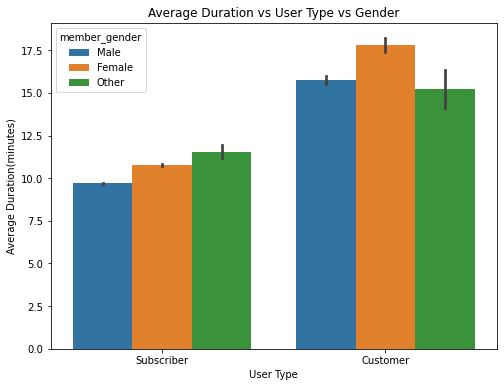

In [24]:
#Make bar plot comparing Average Duration and User Type with hue as 'member gender'
plt.figure(figsize=(8,6))
#Order for hue
order_1 = ['Male','Female','Other']
base_color = sns.color_palette()[0]
#Use bikeshare_c_sub data as the information pertains to duration
sns.barplot(data=bikeshare_c_sub, x = 'user_type', y = 'duration_min', hue = 'member_gender', hue_order =order_1)
plt.xlabel('User Type')
plt.ylabel('Average Duration(minutes)')
plt.title('Average Duration vs User Type vs Gender')
plt.show()

In [ ]:
!jupyter nbconvert Ford_Bikeshare_Data_Exploration_Part_2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Ford_Bikeshare_Data_Exploration_Part_2.ipynb to slides
[NbConvertApp] Writing 726128 bytes to Ford_Bikeshare_Data_Exploration_Part_2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Ford_Bikeshare_Data_Exploration_Part_2.slides.html
Use Control-C to stop this server
